In [1]:
import tensorflow as tf
import keras
import numpy as np
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator


In [3]:
model = tf.keras.models.load_model(r'mobileNetV2model7.h5')

model.summary()

model.save('mobileNetV2modelPb')


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: mobileNetV2modelPb\assets


In [3]:
import os
os.environ [ "PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin/'

from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

#사진으로 저장
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='food.png', show_shapes=True, show_layer_names=True)

[[0.00577775 0.00335447 0.00334476 0.0023748  0.01522767 0.00750783
  0.01079427 0.00367732 0.00349055 0.00794954 0.00772868 0.00486397
  0.00540791 0.00228882 0.00462482 0.01188059 0.00829756 0.00176105
  0.00519018 0.00405336 0.00220975 0.01939921 0.02396369 0.00872706
  0.00562155 0.00224545 0.00472555 0.00138803 0.00118873 0.01697393
  0.00283182 0.01994179 0.00762319 0.0056298  0.00343652 0.00421138
  0.04329326 0.03072588 0.00158999 0.0069217  0.00403816 0.00188138
  0.00108287 0.00188635 0.01196618 0.01434731 0.00374544 0.00193116
  0.00756713 0.00148506 0.00306441 0.03425312 0.00248931 0.02653416
  0.00070901 0.00483045 0.00411214 0.01180677 0.20900615 0.00338385
  0.00206474 0.00243494 0.00430056 0.05670008 0.00280354 0.00327944
  0.03598671 0.01149799 0.00476057 0.01028098 0.00327268 0.00652156
  0.00533699 0.00081172 0.00611113 0.00399994 0.01477078 0.00236166
  0.00352146 0.01824544 0.00293525 0.00463795 0.00460514 0.00455182
  0.00582983 0.0034783  0.00351046 0.00329665 0.

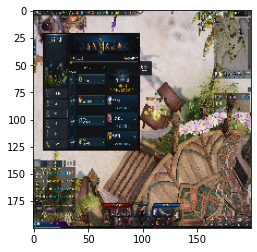

In [17]:
#model = tf.keras.models.load_model(r'D:\pythonWorkspace\COVID_DATA\COVID-test\model/mobileNetV2model7.h5')
model = tf.keras.models.load_model(r'D:\pythonWorkspace\COVID_DATA\COVID-test\model/best_model_101class.hdf5')

#TestImgDir = r"D:\pythonWorkspace\COVID_DATA\COVID-Classifier\dataset\original_images_preprocessed\pneumonia\person9_bacteria_39.jpeg"
TestImgDir = r"C:\Program Files (x86)\Smilegate\Games\LOSTARK\EFGame\Screenshots\Screenshot_200906_223225.jpg"
TestImgDir_Replaced = TestImgDir.replace("\\", "/", 10)

img = keras.preprocessing.image.load_img(
    TestImgDir_Replaced, target_size=(200, 200)
)

input_arr = keras.preprocessing.image.img_to_array(img)
input_arr = np.array([input_arr])/255  # Convert single image to a batch.

#print(input_arr)

# 이미지 제대로 들어갔는지 확인
plt.imshow(input_arr[0])

predictions=model.predict(input_arr)
print(predictions)

#print(type(predictions))
print("###")
MaxValue =0;
MaxNum =0;
for i in range(100) :
    if MaxValue < predictions[0][i] :
        MaxNum = i
        MaxValue = predictions[0][i]
print("몇번쨰 : ",MaxNum , "확률 : ", MaxValue)

In [3]:
from keras.preprocessing.image import ImageDataGenerator


In [7]:
#다른데이터 셋으로 평가해보기

model = tf.keras.models.load_model(r'D:\pythonWorkspace\COVID_DATA\COVID-test\model/mobileNetV2model7_complete.h5')

validation_data_dir = r'D:\pythonWorkspace\COVID_DATA\collection-re2\stacking'
validation_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32
validation_generator = validation_datagen.flow_from_directory(
                            validation_data_dir,
                            target_size=(224,224),
                            batch_size=batch_size,
                            class_mode='categorical')

print(type(validation_generator)) 

model.evaluate(validation_generator)

Found 3036 images belonging to 3 classes.
<class 'tensorflow.python.keras.preprocessing.image.DirectoryIterator'>
95/95 [==============================] - 39s 407ms/step - loss: 0.5947 - accuracy: 0.9002


[0.5947374701499939, 0.9001976251602173]

In [ ]:
# mobileNetV2model6.h5 //accuracy: 0.9184
# mobileNetV2model7.h5 //accuracy: 0.9184
# nasNet4.h5 // accuracy: 0.5947

